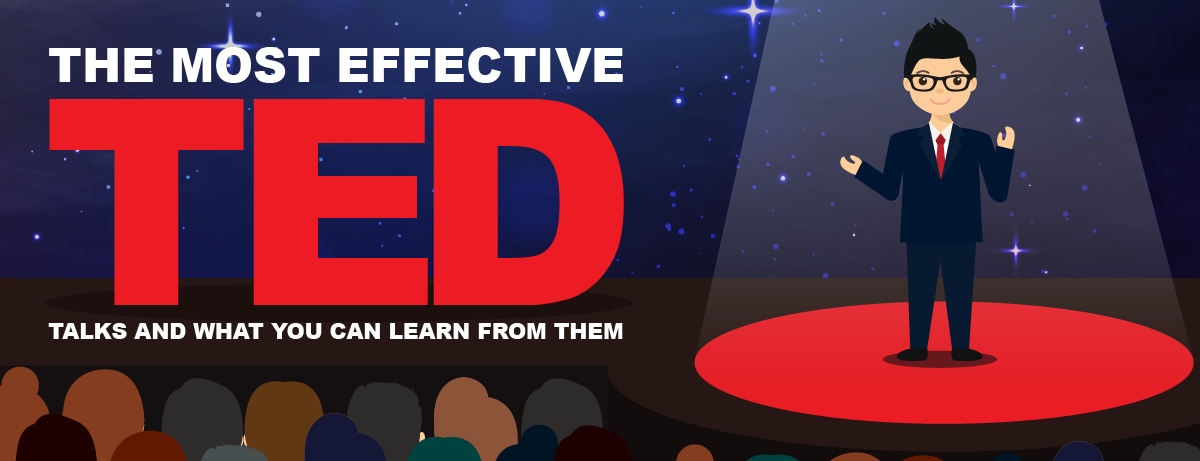

# Projeto 2 - Análise de Dados com Python com Publicações da **TED Talks**
TED é uma série de conferências realizadas na Europa, na Ásia e nas Américas pela fundação Sapling, dos Estados Unidos, sem fins lucrativos, destinadas à disseminação de ideias – segundo as palavras da própria organização, "ideias que merecem ser disseminadas".

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('./data/ted_main.csv')
df.tail()

In [ ]:
print(df.columns)
df.shape

In [ ]:
# Reordenar as colunas
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
df.head(3)

In [ ]:
# Corrigir as Datas
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['film_date'].head(3)

In [ ]:
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['published_date'].head(3)

In [ ]:
df.head(3)

In [ ]:
# Top 5 mais visualizados
top5_talks = df.sort_values('views', ascending=False)[['title', 'main_speaker', 'views']]
top5_talks.head(5)

In [ ]:
df['views'].describe()

In [ ]:
df['comments'].describe()

In [ ]:
sns.distplot(df['comments'])

In [ ]:
# Separar por mês
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1])-1])
df['month'].head(10)

In [ ]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']
month_df.head(3)

In [ ]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [ ]:
# Separar por Ano
df['year'] = df['film_date'].apply(lambda x:x.split('-')[2])
df['year'].head(3)

In [ ]:
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
year_df.head(3)

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

# Top 8 dos Modelos de Machine Learning

<span style="display:block;text-align:center">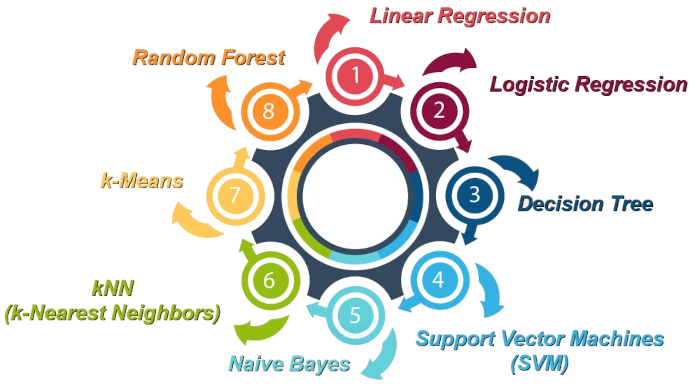</span>

## 1. Regressão Linear
Em estatística, regressão é uma técnica que permite explorar e inferir a relação de uma variável dependente com variáveis independentes específicas.

In [ ]:
# Importar as Bibliotecas
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Correlacionamento entre as variáveis
rel = df.corr()
sns.heatmap(rel, xticklabels=rel.columns, yticklabels=rel.columns, annot=True)
plt.show()

In [ ]:
# Separar as colunas que interessam
df2 = df[['comments', 'views']]
df2.head()

In [ ]:
# Plotar um gráfico
plt.xlabel('Comentário')
plt.ylabel('Visualizações')
plt.scatter(df2.comments, df2.views, color='red', marker='+')

In [ ]:
# Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(df2[['comments']], df2['views'], test_size = .3)

In [ ]:
# Treinar o modelo
regLin = linear_model.LinearRegression()
regLin.fit(X_train, y_train)

In [ ]:
# Realizar as Predições
y_pred = regLin.predict(X_test)
regLin.coef_

In [ ]:
# Verificar a Performance
r2_score(y_test, y_pred)

In [ ]:
# Plotar o Resultado
plt.scatter(X_test, y_test,color = 'lavender')
plt.plot(X_test, y_pred,color = 'pink', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

## 2. Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
# A visualização seja maior que a média atual
desejo = pd.Series(np.where(df['views'] >= 1698297, 1, 0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[['comments']], desejo, test_size = .3)

In [ ]:
regLog = LogisticRegression()
regLog.fit(X_train, y_train)

In [ ]:
# Realizar as Predições
y_pred = regLog.predict(X_test)
regLog.coef_

In [ ]:
# Verificar a Performance
r2_score(y_test, y_pred)

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)

dfG = pd.DataFrame({'Comentario': X_test['comments'], 'Correto': y_test, 'Predito': y_pred})
dfG = dfG.sort_values(by=['Comentario'])

plt.scatter(dfG['Comentario'], dfG['Correto'], color='red', marker='+')
plt.plot(dfG['Comentario'], dfG['Predito'], color='blue', linewidth=2)
plt.show()

Obrigado e até a próxima \
Fernando Anselmo